Treinaremos com 8574 elementos e testaremos com 2859 elementos
A acurácia foi 95.03%


/home/local/IDEALINVEST/jose.calado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


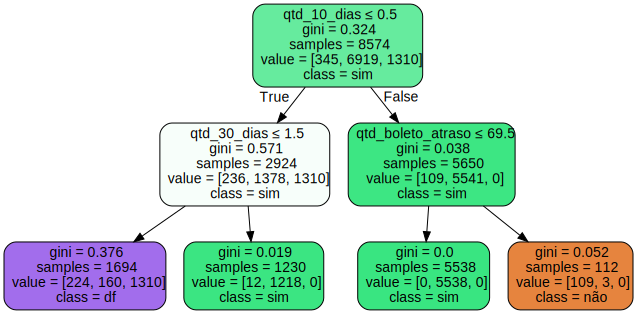

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import decimal as D
from sklearn import metrics



uri = "https://raw.githubusercontent.com/JRcalado/dados/master/alunos.csv"

dados = pd.read_csv(uri,dtype={
      'Total de boletos que ja  que atrasou' : str,
      'qtd atrasou mais de 30 dias' : str,
      'qtd atrasou mais de 10 dias' : str,
      'Pagador': str})

dados.dropna(axis = 0, inplace = True)
dados.head() #imprime premeiros 5 elementos
# Renomeando  colunas  do csc
a_renomear  = {
    "Total de boletos que ja  que atrasou" : "qtd_boleto_atraso",
    "qtd atrasou mais de 30 dias" : "qtd_30_dias",
    "qtd atrasou mais de 10 dias" : "qtd_10_dias",
    "Pagador"  : "Pagador"
}

dados = dados.rename(columns=a_renomear)
dados.head() #imprime premeiros 5 elementos


x =  dados[["qtd_boleto_atraso", "qtd_30_dias","qtd_10_dias"]]
y =  dados[["Pagador"]]

SEED = 5 
np.random.seed(SEED)

treino_x, teste_x , treino_y , teste_y  = train_test_split(x, y, test_size = 0.25,stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

# a_trocar ={
#     2 : 'Bom pagador',
#     1 : 'Regular',
#     0 : 'Mau pagador'
# }
# previsoes.map(a_trocar)

teste_x['teste'] = previsoes
teste_x.head()


from sklearn.tree import  export_graphviz
import graphviz

#extrai dados referente a arvore de decisão

features = x.columns
dot_data = export_graphviz(modelo,out_file=None,
                           filled = True,
                           rounded = True,
                           feature_names=features,
                            class_names = ["não","sim","df"],
                           rotate=False, special_characters=True
                          )
grafico =  graphviz.Source(dot_data)

grafico

